In [1]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from joblib import Parallel, delayed
import datetime
import time
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the dataset
df = pd.read_csv('/content/Cleaned_dataset.csv')

# Display basic information
print(f"Dataset Shape: {df.shape}")
print("\nFirst few rows:")
display(df.head())

# Check data types
print("\nData Types:")
display(df.dtypes)

Dataset Shape: (49452, 13)

First few rows:


,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
0,2023-01-16,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1.0,5335.0
1,2023-01-16,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1.0,5899.0
2,2023-01-16,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1.0,5801.0
3,2023-01-16,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1.0,5794.0
4,2023-01-16,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1.0,5955.0



Data Types:


,0
Date_of_journey,object
Journey_day,object
Airline,object
Flight_code,object
Class,object
Source,object
Departure,object
Total_stops,object
Arrival,object
Destination,object


In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
display(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values found")

# Basic statistics for numerical columns
print("\nNumerical Statistics:")
display(df.describe())

# Explore categorical variables
print("\nCategorical Variables Overview:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"\n{col}: {df[col].nunique()} unique values")
    if df[col].nunique() < 10:  # Only display if few unique values
        display(df[col].value_counts())


Missing Values:


,0
Duration_in_hours,1
Days_left,1
Fare,1



Numerical Statistics:


,Duration_in_hours,Days_left,Fare
count,49451.000000,49451.000000,49451.000000
mean,10.763363,25.237609,19618.477483
std,7.133306,14.171453,17637.686550
min,1.916700,1.000000,3818.000000
25%,5.333300,13.000000,7750.000000
50%,9.250000,25.000000,10837.000000
75%,14.666700,37.000000,29805.000000
max,41.583300,50.000000,110441.000000



Categorical Variables Overview:

Date_of_journey: 50 unique values

Journey_day: 7 unique values


,count
Journey_day,
Monday,7857
Wednesday,7114
Tuesday,7031
Thursday,7026
Saturday,6981
Friday,6813
Sunday,6630



Airline: 7 unique values


,count
Airline,
Vistara,23539
Air India,13019
Indigo,6268
AirAsia,3314
GO FIRST,2310
SpiceJet,902
AkasaAir,100



Flight_code: 301 unique values

Class: 4 unique values


,count
Class,
Economy,27956
Business,13621
Premium Economy,7800
First,75



Source: 1 unique values


,count
Source,
Delhi,49452



Departure: 4 unique values


,count
Departure,
12 PM - 6 PM,16896
6 AM - 12 PM,15693
After 6 PM,13228
Before 6 AM,3635



Total_stops: 3 unique values


,count
Total_stops,
1-stop,37959
non-stop,9062
2+-stop,2431



Arrival: 4 unique values


,count
Arrival,
After 6 PM,20630
6 AM - 12 PM,14390
12 PM - 6 PM,10395
Before 6 AM,4037



Destination: 4 unique values


,count
Destination,
Mumbai,19113
Bangalore,17636
Hyderabad,12702
Hy,1


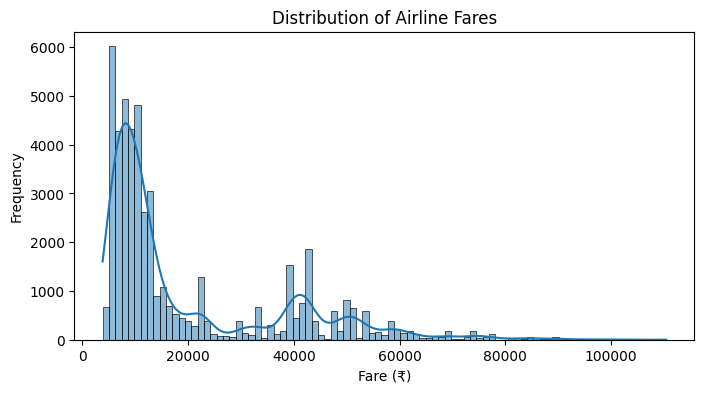

In [5]:
# Visualize fare distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['Fare'], kde=True)
plt.title('Distribution of Airline Fares')
plt.xlabel('Fare (₹)')
plt.ylabel('Frequency')
plt.show()

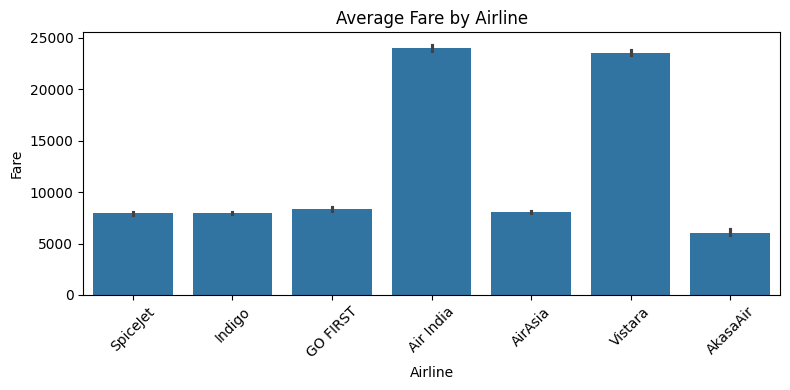

In [6]:
# Visualize average fare by airline
plt.figure(figsize=(8, 4))
sns.barplot(x='Airline', y='Fare', data=df, estimator=np.mean)
plt.title('Average Fare by Airline')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

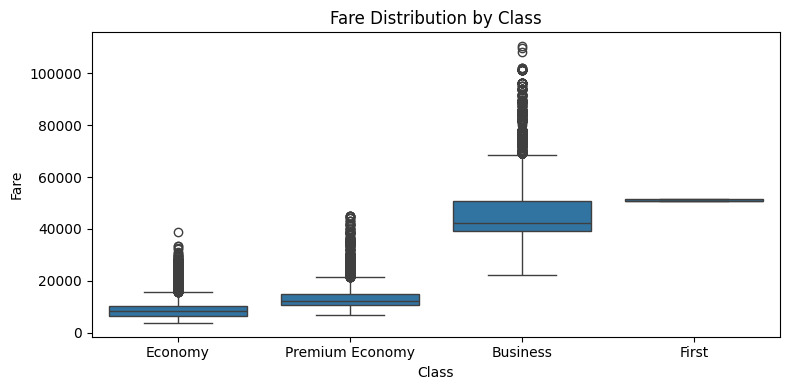

In [7]:
# Visualize fare by class
plt.figure(figsize=(8, 4))
sns.boxplot(x='Class', y='Fare', data=df)
plt.title('Fare Distribution by Class')
plt.tight_layout()
plt.show()

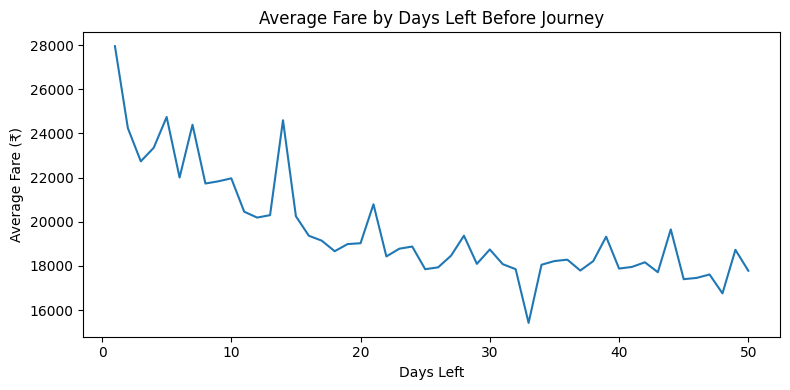

In [8]:
# Visualize fare trend by days left before journey
plt.figure(figsize=(8, 4))
sns.lineplot(x='Days_left', y='Fare', data=df, ci=None)
plt.title('Average Fare by Days Left Before Journey')
plt.xlabel('Days Left')
plt.ylabel('Average Fare (₹)')
plt.tight_layout()
plt.show()

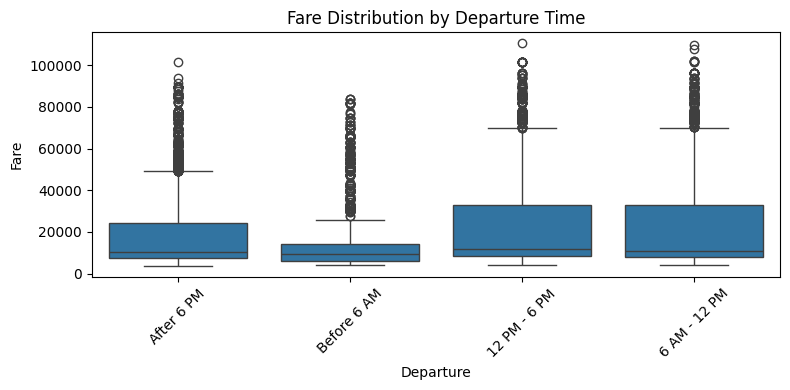

In [9]:
# Visualize fare by departure time
plt.figure(figsize=(8, 4))
sns.boxplot(x='Departure', y='Fare', data=df)
plt.title('Fare Distribution by Departure Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

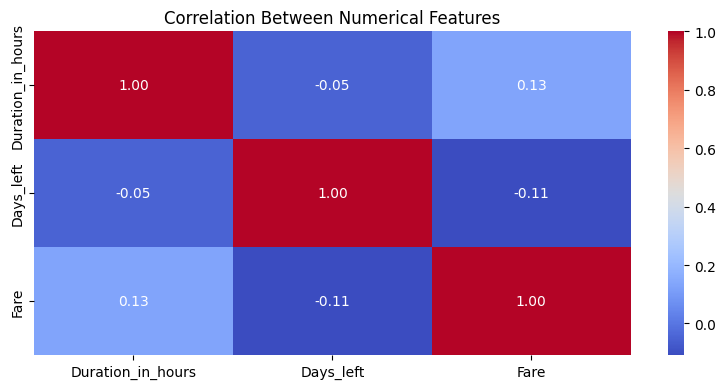

In [10]:
# Correlation heatmap for numerical features
numerical_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(8, 4))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Numerical Features')
plt.tight_layout()
plt.show()

In [19]:
# Map time categories
time_categories = {
    'Before 6 AM': 0,
    '6 AM - 12 PM': 1,
    '12 PM - 6 PM': 2,
    'After 6 PM': 3
}

# Preprocess function
def preprocess_data(df):
    df = df.copy()
    df['Departure_cat'] = df['Departure'].map(time_categories)
    df['Arrival_cat'] = df['Arrival'].map(time_categories)
    df['Date_of_journey'] = pd.to_datetime(df['Date_of_journey'])
    df['Month'] = df['Date_of_journey'].dt.month
    df['Year'] = df['Date_of_journey'].dt.year
    df.drop(['Date_of_journey', 'Departure', 'Arrival'], axis=1, inplace=True, errors='ignore')
    return df

data = preprocess_data(df)

data = data.dropna(subset=['Fare'])


categorical_features = ['Airline', 'Flight_code', 'Class', 'Source', 'Destination', 'Total_stops', 'Journey_day']
numerical_features = ['Duration_in_hours', 'Days_left', 'Month', 'Year', 'Departure_cat', 'Arrival_cat']

X = data.drop('Fare', axis=1)
y = data['Fare']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipelines
categorical_transformer = Pipeline([('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])
numerical_transformer = Pipeline([('scaler', StandardScaler())])

preprocessor = ColumnTransformer([
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

# Fit transformer
X_train_pre = preprocessor.fit_transform(X_train)
X_test_pre = preprocessor.transform(X_test)


In [20]:
print((data.isna().sum()))

Journey_day          0
Airline              0
Flight_code          0
Class                0
Source               0
Total_stops          0
Destination          0
Duration_in_hours    0
Days_left            0
Fare                 0
Departure_cat        0
Arrival_cat          0
Month                0
Year                 0
dtype: int64


In [21]:
models = {
    'RandomForest': RandomForestRegressor(n_estimators=30, random_state=42, n_jobs=-1, max_samples=0.8, max_depth=20, min_samples_split=5),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=30, random_state=42, subsample=0.8, max_depth=6, learning_rate=0.1)
}

kf = KFold(n_splits=3, shuffle=True, random_state=42)
model_results = {}

def evaluate_fold(model, train_idx, val_idx):
    X_fold_train, X_fold_val = X_train_pre[train_idx], X_train_pre[val_idx]
    y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
    model.fit(X_fold_train, y_fold_train)
    return r2_score(y_fold_val, model.predict(X_fold_val))

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_pre, y_train)

    start = time.time()
    cv_scores = Parallel(n_jobs=-1)(delayed(evaluate_fold)(model, tr, val) for tr, val in kf.split(X_train_pre))
    print(f"CV R²: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

    y_pred = model.predict(X_test_pre)
    r2 = r2_score(y_test, y_pred)

    model_results[name] = {
        'model': model,
        'r2': r2,
        'mae': mean_absolute_error(y_test, y_pred),
        'rmse': np.sqrt(mean_squared_error(y_test, y_pred))
    }

best_model_name = max(model_results, key=lambda k: model_results[k]['r2'])
best_model = model_results[best_model_name]['model']
print(f"\n✅ Best model: {best_model_name} with R² = {model_results[best_model_name]['r2']:.4f}")



Training RandomForest...
CV R²: 0.9552 ± 0.0010

Training GradientBoosting...
CV R²: 0.9295 ± 0.0008

✅ Best model: RandomForest with R² = 0.9584


In [30]:
def prepare_user_input(user_dict):
    user_df = pd.DataFrame([user_dict])
    user_df['Date_of_journey'] = pd.to_datetime(user_df['Date_of_journey'])
    user_df['Month'] = user_df['Date_of_journey'].dt.month
    user_df['Year'] = user_df['Date_of_journey'].dt.year
    user_df['Departure_cat'] = user_df['Departure'].map(time_categories)
    user_df['Arrival_cat'] = user_df['Arrival'].map(time_categories)
    user_df.drop(['Date_of_journey', 'Departure', 'Arrival'], axis=1, inplace=True)
    return user_df

def predict_price(user_input, days_left):
    user_input['Days_left'] = days_left
    processed = preprocessor.transform(prepare_user_input(user_input))
    return best_model.predict(processed)[0]

# Airlines and days to compare
airlines_to_compare = ['Air India', 'IndiGo', 'Vistara', 'SpiceJet', 'GoAir']
days_to_compare = [0, 10, 15, 20]

# Base input
base_input = {
    'Date_of_journey': '2025-05-01',
    'Journey_day': 'Tuesday',
    'Flight_code': 'XX123',
    'Class': 'Economy',
    'Source': 'Delhi',
    'Departure': '6 AM - 12 PM',
    'Total_stops': '1 stop',
    'Arrival': '12 PM - 6 PM',
    'Destination': 'Mumbai',
    'Duration_in_hours': 2.5
}

print(f"\n🔍 Fare comparison for {base_input['Source']} → {base_input['Destination']} on {base_input['Date_of_journey']}:\n")

# Nested loop: for each airline, predict for each booking day
for airline in airlines_to_compare:
    print(f"✈️ {airline}:")
    price_today = None
    for days in days_to_compare:
        temp_input = base_input.copy()
        temp_input['Airline'] = airline
        price = predict_price(temp_input, days_left=days)
        if days == 0:
            price_today = price
            print(f"  - Booking today: ₹{price:.2f}")
        else:
            change = price - price_today
            trend = '📈 Increase' if change > 0 else '📉 Decrease'
            print(f"  - Booking after {days} days: ₹{price:.2f} ({trend} of ₹{abs(change):.2f})")
    print("-" * 40)

# Optional: sort today's fares across airlines
results_today = []
for airline in airlines_to_compare:
    temp_input = base_input.copy()
    temp_input['Airline'] = airline
    price = predict_price(temp_input, days_left=0)
    results_today.append((airline, price))

results_today.sort(key=lambda x: x[1])
print(f"\n💡 Sorted fares if booked today:\n")
for airline, price in results_today:
    print(f"- {airline}: ₹{price:.2f}")




🔍 Fare comparison for Delhi → Mumbai on 2025-05-01:

✈️ Air India:
  - Booking today: ₹7003.89
  - Booking after 10 days: ₹6961.54 (📉 Decrease of ₹42.34)
  - Booking after 15 days: ₹6315.58 (📉 Decrease of ₹688.31)
  - Booking after 20 days: ₹6143.12 (📉 Decrease of ₹860.76)
----------------------------------------
✈️ IndiGo:
  - Booking today: ₹7050.67
  - Booking after 10 days: ₹6752.55 (📉 Decrease of ₹298.12)
  - Booking after 15 days: ₹6274.11 (📉 Decrease of ₹776.56)
  - Booking after 20 days: ₹6056.65 (📉 Decrease of ₹994.02)
----------------------------------------
✈️ Vistara:
  - Booking today: ₹12142.70
  - Booking after 10 days: ₹7384.52 (📉 Decrease of ₹4758.17)
  - Booking after 15 days: ₹6767.06 (📉 Decrease of ₹5375.64)
  - Booking after 20 days: ₹6307.59 (📉 Decrease of ₹5835.10)
----------------------------------------
✈️ SpiceJet:
  - Booking today: ₹6992.94
  - Booking after 10 days: ₹6216.63 (📉 Decrease of ₹776.31)
  - Booking after 15 days: ₹6425.52 (📉 Decrease of ₹567.42